In [ ]:
# face synchrony week값과 그룹의 성과 week 값 간의 상관관계를 그리는 코드. 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

### 주차별 face synchrony 값과 주차별 그룹 성과 값간의 상관관계를 그리는 코드. 

In [ ]:
# 파일 경로
group_performance_file = 'C:/Users/user/Desktop/Group_performance.xlsx'
# 주차 별, pitch x 값의 변화량을 average한 값. 
total_synchrony_file = 'D:/MultiModal/MultiModal_Model/Head_Rotation_Mouse/face_Synchrony/total_synchrony(delta)_1.xlsx'

# plot을 저장하기 위한 부분.
save_path = 'D:/MultiModal/MultiModal_Model/Head_Rotation_Mouse/face_Synchrony/'

# 데이터 불러오기
group_performance = pd.read_excel(group_performance_file)
total_synchrony = pd.read_excel(total_synchrony_file)

# 그룹 이름을 인덱스로 설정
group_performance.set_index('Unnamed: 0', inplace=True)
total_synchrony.set_index('Unnamed: 0', inplace=True)

# 두 데이터프레임 병합(X 축에는 그룹 성과 점수)
merged_data = group_performance.join(total_synchrony, lsuffix='_performance', rsuffix='_Synchrony')

# NaN 값이 있는 행 제거
cleaned_data = merged_data.dropna()

# 각 주차별로 성능과 동기화 데이터 간의 상관관계 및 산점도 그리기
weeks = ['1W', '2W', '3W', '4W']

# x축과 y축 값의 범주 계산
'''
# x_min = cleaned_data[[f'{week}_performance' for week in weeks]].min().min()
# x_max = cleaned_data[[f'{week}_performance' for week in weeks]].max().max()
# y_min = cleaned_data[[f'{week}_face rotation' for week in weeks]].min().min()
# y_max = cleaned_data[[f'{week}_face rotation' for week in weeks]].max().max()

'''
cleaned_data.reset_index(inplace=True)

#그룹 이름에 None 값이 있는 경우 'Group'으로 대체
cleaned_data['Unnamed: 0'] = cleaned_data['Unnamed: 0'].fillna('Group')

# 데이터를 길게 변환
long_data = pd.DataFrame()

for week in weeks:
    temp_df = cleaned_data[[f'{week}_Synchrony', f'{week}_performance']].copy() # _performance
    temp_df.columns = ['Synchrony', 'Performance'] # 'Synchrony'
    temp_df['Week'] = week
    temp_df['Group'] = cleaned_data['Unnamed: 0']
    long_data = pd.concat([long_data, temp_df])

plt.figure(figsize=(14, 10))

# 산점도 그리기
scatter = sns.scatterplot(data=long_data, x='Performance', y='Synchrony', hue='Group', style='Week', palette='tab10', s=100)
sns.regplot(data=long_data, x='Performance', y='Synchrony', scatter=False)

# 각 주차별 상관관계 및 p-value 계산 및 주석 추가
for week in weeks:
    week_data = long_data[long_data['Week'] == week]
    corr, p_value = pearsonr(week_data['Performance'], week_data['Synchrony']) # face_rotation
    corr_text = f'{week}: r={corr:.2f}' #  p={p_value:.2e}
    plt.annotate(corr_text, xy=(0.05, 0.95 - 0.05 * weeks.index(week)), xycoords='axes fraction', fontsize=12, 
                 verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

'''
# 이전에 하나의 그래프가 아닌 4개의 그래프로 값을 따로 보여줄 때의 코드 
# # for i, week in enumerate(weeks, 1):
# #     x = cleaned_data[f'{week}_performance']
# #     y = cleaned_data[f'{week}_synchrony']
# #     #y = cleaned_data[f'{week}_face rotation']
    
# #     # 상관관계 및 p-value 계산
# #     corr, p_value = pearsonr(x, y)
# #     corr_text = f'{week}: r={corr:.2f}, p={p_value:.2e}'
    
# #     # 산점도 그리기
# #     plt.subplot(2, 2, i)
# #     #sns.scatterplot(x=x, y=y)
    
# #     # 각 그룹 명을 표시해주기 위해, 다음과 같이 설정. 
# #     # 하나의 그래프에 모두 표시 
# #     scatter = sns.scatterplot(x=x, y=y, hue=cleaned_data['Unnamed: 0'], style=week, palette='tab10', s=100)
# #     #sns.regplot(x=x, y=y, scatter=False, ax=plt.gca())
# #     sns.regplot(x=x, y=y, scatter=False, label=corr_text)
   
'''
   
'''
#plt 을 출력하기 위한 이름, 저장하기 위한 코드 정립. 
'''
plt.title('Scatter Plot of Group Performance vs. Synchrony (1W to 4W)')
plt.xlabel('Performance')
plt.ylabel('Synchrony') # face movement

'''
#x,y 축의 범위를 조정해줄 때 사용하는 코드.
#plt.xlim(10, 50)
#plt.ylim(0.0, 3.0) # (0.0, 3.0) (-0.005, 0.025)
'''

plt.legend(title='Group & Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'Group_Performance_vs_Synchrony_all_weeks.png')) # body_movement_all
#plt.show()
plt.close()

#     plt.title(f'Scatter Plot of {week}_performance vs. {week}_synchrony')
#     #plt.title(f'Scatter Plot of {week}_performance vs. {week}_face rotation')
#     plt.xlabel(f'{week}_performance')
#     #plt.ylabel(f'{week}_synchrony')
#     plt.ylabel(f'{week}_face rotation')
#     #plt.ylim(y_min, y_max)
    
#     # 최대, 최솟 값 맞춰서 보여줄 수 있도록 함. 
#     # plt.xlim(x_min, x_max)
#     # plt.ylim(y_min, y_max)

#     plt.xlim(10, 50)
#     #plt.ylim(0.0, 3.0)
#     plt.ylim(-0.005, 0.025)
    
#     plt.annotate(corr_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, 
#                  verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

#     # legend 제목 설정
#     handles, labels = scatter.get_legend_handles_labels()
#     scatter.legend(handles=handles, labels=labels, title='Group')

# plt.tight_layout()
# plt.savefig(os.path.join(save_path, 'Group_performance & group synchrony')) # group synchrony || face rotation
# plt.show()
# plt.close()

### 주차별 성과 점수와 얼굴 총 회전량과의 상관관계

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
# 파일 경로
group_performance_file = 'C:/Users/user/Desktop/Group_performance.xlsx'

# 얼굴 총 움직임량 값을 average한 값. 
face_total = 'C:/Users/user/Documents/Face_Rotation_total.xlsx'

# 얼굴 몸 움직임량 값을 저장한 부분.
#face_movement = 'D:/MultiModal/Data/Data_PreProcessing/Head_Rotation_Mouse/group_weekly_face_movement.xlsx'
#body_movement = 'C:/Users/user/Documents/Body_total_movement.xlsx'
#lip_distance = 'D:/MultiModal/Data/Data_PreProcessing/Head_Rotation_Mouse/group_weekly_lip_distance_means.xlsx'  

# plot을 저장하기 위한 부분.
save_path = 'D:/MultiModal/MultiModal_Model/Head_Rotation_Mouse/face_Synchrony/'

# 데이터 불러오기
group_performance = pd.read_excel(group_performance_file)
total_face_rotation = pd.read_excel(face_total)

#total_face_movement = pd.read_excel(face_movement)
#total_body_movement = pd.read_excel(body_movement)
#total_lip_distance = pd.read_excel(lip_distance)

# 그룹 이름을 인덱스로 설정
group_performance.set_index('Unnamed: 0', inplace=True)
total_face_rotation.set_index('Unnamed: 0', inplace=True)
#total_face_movement.set_index('Unnamed: 0', inplace=True)
#total_body_movement.set_index('Unnamed: 0', inplace=True)
#total_lip_distance.set_index('Unnamed: 0', inplace=True)

# 두 데이터프레임 병합(X 축에는 그룹 성과 점수)
merged_data = group_performance.join(total_face_rotation, lsuffix='_performance', rsuffix='_face_rotation')
#merged_data = group_performance.join(total_body_movement, lsuffix='_performance', rsuffix='_lip_distance')
#merged_data = group_performance.join(total_lip_distance, lsuffix='_performance', rsuffix='_lip_distance')

'''
#y 축에는 총 얼굴 회전량 값을 넣어주기 위함.
'''
#merged_data = total_synchrony.join(total_face_rotation, lsuffix='_Synchrony', rsuffix='_face_movement')
#merged_data = total_face_movement.join(group_performance, lsuffix='_face_movement', rsuffix='_group_performance')

# NaN 값이 있는 행 제거
cleaned_data = merged_data.dropna()

# 각 주차별로 성능과 동기화 데이터 간의 상관관계 및 산점도 그리기
weeks = ['1W', '2W', '3W', '4W']

# x축과 y축 값의 범주 계산
'''
# x_min = cleaned_data[[f'{week}_performance' for week in weeks]].min().min()
# x_max = cleaned_data[[f'{week}_performance' for week in weeks]].max().max()
# y_min = cleaned_data[[f'{week}_face rotation' for week in weeks]].min().min()
# y_max = cleaned_data[[f'{week}_face rotation' for week in weeks]].max().max()

'''
cleaned_data.reset_index(inplace=True)

#그룹 이름에 None 값이 있는 경우 'Group'으로 대체
cleaned_data['Unnamed: 0'] = cleaned_data['Unnamed: 0'].fillna('Group')

# 데이터를 길게 변환
long_data = pd.DataFrame()

for week in weeks:
    temp_df = cleaned_data[[f'{week}_face_rotation', f'{week}_performance']].copy() # _performance
    temp_df.columns = ['face_rotation', 'Performance'] # 'Synchrony'
    temp_df['Week'] = week
    temp_df['Group'] = cleaned_data['Unnamed: 0']
    long_data = pd.concat([long_data, temp_df])

plt.figure(figsize=(14, 10))

# 산점도 그리기
scatter = sns.scatterplot(data=long_data, x='Performance', y='face_rotation', hue='Group', style='Week', palette='tab10', s=100)
sns.regplot(data=long_data, x='Performance', y='face_rotation', scatter=False)

# 각 주차별 상관관계 및 p-value 계산 및 주석 추가
for week in weeks:
    week_data = long_data[long_data['Week'] == week]
    corr, p_value = pearsonr(week_data['Performance'], week_data['face_rotation']) # face_rotation
    corr_text = f'{week}: r={corr:.2f}' # p={p_value:.2e}
    plt.annotate(corr_text, xy=(0.05, 0.95 - 0.05 * weeks.index(week)), xycoords='axes fraction', fontsize=12, 
                 verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

'''
#plt 을 출력하기 위한 이름, 저장하기 위한 코드 정립. 
'''
plt.title('Scatter Plot of Group Performance vs. face rotation (1W to 4W)')
plt.xlabel('Performance')
plt.ylabel('face rotation')

'''
#x,y 축의 범위를 조정해줄 때 사용하는 코드.
#plt.xlim(10, 50)
#plt.ylim(0.0, 3.0) # (0.0, 3.0) (-0.005, 0.025)
'''

plt.legend(title='Group & Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'Group_Performance_vs_face_rotation_all_weeks.png')) # body_movement_all
#plt.show()
plt.close()

### 주차별 성과 점수와 얼굴 총 움직임량과의 상관관계

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
# 파일 경로
group_performance_file = 'C:/Users/user/Desktop/Group_performance.xlsx'

# 얼굴 몸 움직임량 값을 저장한 부분.
face_movement = 'D:/MultiModal/Data/Data_PreProcessing/Head_Rotation_Mouse/group_weekly_face_movement.xlsx'
#body_movement = 'C:/Users/user/Documents/Body_total_movement.xlsx'
#lip_distance = 'D:/MultiModal/Data/Data_PreProcessing/Head_Rotation_Mouse/group_weekly_lip_distance_means.xlsx'  

# plot을 저장하기 위한 부분.
save_path = 'D:/MultiModal/MultiModal_Model/Head_Rotation_Mouse/face_Synchrony/'

# 데이터 불러오기
group_performance = pd.read_excel(group_performance_file)
total_face_movement = pd.read_excel(face_movement)
#total_body_movement = pd.read_excel(body_movement)
#total_lip_distance = pd.read_excel(lip_distance)

# 그룹 이름을 인덱스로 설정
group_performance.set_index('Unnamed: 0', inplace=True)
total_face_movement.set_index('Unnamed: 0', inplace=True)
#total_body_movement.set_index('Unnamed: 0', inplace=True)
#total_lip_distance.set_index('Unnamed: 0', inplace=True)

# 두 데이터프레임 병합(X 축에는 그룹 성과 점수)
merged_data = group_performance.join(total_face_movement, lsuffix='_performance', rsuffix='_face_rotation')
#merged_data = group_performance.join(total_body_movement, lsuffix='_performance', rsuffix='_lip_distance')
#merged_data = group_performance.join(total_lip_distance, lsuffix='_performance', rsuffix='_lip_distance')

'''
#y 축에는 총 얼굴 회전량 값을 넣어주기 위함.
'''
#merged_data = total_synchrony.join(total_face_rotation, lsuffix='_Synchrony', rsuffix='_face_movement')

# NaN 값이 있는 행 제거
cleaned_data = merged_data.dropna()

# 각 주차별로 성능과 동기화 데이터 간의 상관관계 및 산점도 그리기
weeks = ['1W', '2W', '3W', '4W']

# x축과 y축 값의 범주 계산
'''
# x_min = cleaned_data[[f'{week}_performance' for week in weeks]].min().min()
# x_max = cleaned_data[[f'{week}_performance' for week in weeks]].max().max()
# y_min = cleaned_data[[f'{week}_face rotation' for week in weeks]].min().min()
# y_max = cleaned_data[[f'{week}_face rotation' for week in weeks]].max().max()

'''
cleaned_data.reset_index(inplace=True)

#그룹 이름에 None 값이 있는 경우 'Group'으로 대체
cleaned_data['Unnamed: 0'] = cleaned_data['Unnamed: 0'].fillna('Group')

# 데이터를 길게 변환
long_data = pd.DataFrame()

for week in weeks:
    temp_df = cleaned_data[[f'{week}_face_movement', f'{week}_performance']].copy() # _performance
    temp_df.columns = ['face_movement', 'Performance'] # 'Synchrony'
    temp_df['Week'] = week
    temp_df['Group'] = cleaned_data['Unnamed: 0']
    long_data = pd.concat([long_data, temp_df])

plt.figure(figsize=(14, 10))

# 산점도 그리기
scatter = sns.scatterplot(data=long_data, x='Performance', y='face_movement', hue='Group', style='Week', palette='tab10', s=100)
sns.regplot(data=long_data, x='Performance', y='face_movement', scatter=False)

# 각 주차별 상관관계 및 p-value 계산 및 주석 추가
for week in weeks:
    week_data = long_data[long_data['Week'] == week]
    corr, p_value = pearsonr(week_data['Performance'], week_data['face_movement']) # face_rotation
    corr_text = f'{week}: r={corr:.2f}' # p={p_value:.2e}
    plt.annotate(corr_text, xy=(0.05, 0.95 - 0.05 * weeks.index(week)), xycoords='axes fraction', fontsize=12, 
                 verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

'''
#plt 을 출력하기 위한 이름, 저장하기 위한 코드 정립. 
'''
plt.title('Scatter Plot of Group Performance vs. face movement (1W to 4W)')
plt.xlabel('Performance')
plt.ylabel('face movement')

'''
#x,y 축의 범위를 조정해줄 때 사용하는 코드.
#plt.xlim(10, 50)
#plt.ylim(0.0, 3.0) # (0.0, 3.0) (-0.005, 0.025)
'''

plt.legend(title='Group & Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'Group_Performance_vs_face_movement_all_weeks.png')) # body_movement_all
#plt.show()
plt.close()

### 주차별 그룹의 성과 점수와 그룹의 몸 움직임과의 상관관계 그래프

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
# 파일 경로
group_performance_file = 'C:/Users/user/Desktop/Group_performance.xlsx'

# 얼굴 몸 움직임량 값을 저장한 부분.
body_movement = 'C:/Users/user/Documents/Body_total_movement.xlsx'
#lip_distance = 'D:/MultiModal/Data/Data_PreProcessing/Head_Rotation_Mouse/group_weekly_lip_distance_means.xlsx'  

# plot을 저장하기 위한 부분.
save_path = 'D:/MultiModal/MultiModal_Model/Head_Rotation_Mouse/face_Synchrony/'

# 데이터 불러오기
group_performance = pd.read_excel(group_performance_file)
total_body_movement = pd.read_excel(body_movement)
#total_lip_distance = pd.read_excel(lip_distance)

# 그룹 이름을 인덱스로 설정
group_performance.set_index('Unnamed: 0', inplace=True)
total_body_movement.set_index('Unnamed: 0', inplace=True)
#total_lip_distance.set_index('Unnamed: 0', inplace=True)

# 두 데이터프레임 병합(X 축에는 그룹 성과 점수)
merged_data = group_performance.join(total_body_movement, lsuffix='_performance', rsuffix='_body_movement')
#merged_data = group_performance.join(total_lip_distance, lsuffix='_performance', rsuffix='_lip_distance')


# NaN 값이 있는 행 제거
cleaned_data = merged_data.dropna()

# 각 주차별로 성능과 동기화 데이터 간의 상관관계 및 산점도 그리기
weeks = ['1W', '2W', '3W', '4W']

# x축과 y축 값의 범주 계산
'''
# x_min = cleaned_data[[f'{week}_performance' for week in weeks]].min().min()
# x_max = cleaned_data[[f'{week}_performance' for week in weeks]].max().max()
# y_min = cleaned_data[[f'{week}_face rotation' for week in weeks]].min().min()
# y_max = cleaned_data[[f'{week}_face rotation' for week in weeks]].max().max()

'''
cleaned_data.reset_index(inplace=True)

#그룹 이름에 None 값이 있는 경우 'Group'으로 대체
cleaned_data['Unnamed: 0'] = cleaned_data['Unnamed: 0'].fillna('Group')

# 데이터를 길게 변환
long_data = pd.DataFrame()

for week in weeks:
    temp_df = cleaned_data[[f'{week}_body_movement', f'{week}_performance']].copy() # _performance
    temp_df.columns = ['body_movement', 'Performance'] # 'Synchrony'
    temp_df['Week'] = week
    temp_df['Group'] = cleaned_data['Unnamed: 0']
    long_data = pd.concat([long_data, temp_df])

plt.figure(figsize=(14, 10))

# 산점도 그리기
scatter = sns.scatterplot(data=long_data, x='Performance', y='body_movement', hue='Group', style='Week', palette='tab10', s=100)
sns.regplot(data=long_data, x='Performance', y='body_movement', scatter=False)

# 각 주차별 상관관계 및 p-value 계산 및 주석 추가
for week in weeks:
    week_data = long_data[long_data['Week'] == week]
    corr, p_value = pearsonr(week_data['Performance'], week_data['body_movement']) # face_rotation
    corr_text = f'{week}: r={corr:.2f}' # p={p_value:.2e}
    plt.annotate(corr_text, xy=(0.05, 0.95 - 0.05 * weeks.index(week)), xycoords='axes fraction', fontsize=12, 
                 verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

'''
#plt 을 출력하기 위한 이름, 저장하기 위한 코드 정립. 
'''
plt.title('Scatter Plot of Group Performance vs. body movement (1W to 4W)')
plt.xlabel('Performance')
plt.ylabel('body movement')

'''
#x,y 축의 범위를 조정해줄 때 사용하는 코드.
#plt.xlim(10, 50)
#plt.ylim(0.0, 3.0) # (0.0, 3.0) (-0.005, 0.025)
'''

plt.legend(title='Group & Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'Group_Performance_vs_body_movement_all_weeks.png')) # body_movement_all
#plt.show()
plt.close()

### 주차별 그룹 성과 점수와 주차별 입 모양과의 상관관계 그래프

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
# 파일 경로
group_performance_file = 'C:/Users/user/Desktop/Group_performance.xlsx'

# 얼굴 몸 움직임량 값을 저장한 부분.
lip_distance = 'D:/MultiModal/Data/Data_PreProcessing/Head_Rotation_Mouse/group_weekly_lip_distance_means.xlsx'  

# plot을 저장하기 위한 부분.
save_path = 'D:/MultiModal/MultiModal_Model/Head_Rotation_Mouse/face_Synchrony/'

# 데이터 불러오기
group_performance = pd.read_excel(group_performance_file)
total_lip_distance = pd.read_excel(lip_distance)

# 그룹 이름을 인덱스로 설정
group_performance.set_index('Unnamed: 0', inplace=True)
total_lip_distance.set_index('Unnamed: 0', inplace=True)

# 두 데이터프레임 병합(X 축에는 그룹 성과 점수)
merged_data = group_performance.join(total_lip_distance, lsuffix='_performance', rsuffix='_lip_distance')

# NaN 값이 있는 행 제거
cleaned_data = merged_data.dropna()

# 각 주차별로 성능과 동기화 데이터 간의 상관관계 및 산점도 그리기
weeks = ['1W', '2W', '3W', '4W']

# x축과 y축 값의 범주 계산
'''
# x_min = cleaned_data[[f'{week}_performance' for week in weeks]].min().min()
# x_max = cleaned_data[[f'{week}_performance' for week in weeks]].max().max()
# y_min = cleaned_data[[f'{week}_face rotation' for week in weeks]].min().min()
# y_max = cleaned_data[[f'{week}_face rotation' for week in weeks]].max().max()

'''
cleaned_data.reset_index(inplace=True)

#그룹 이름에 None 값이 있는 경우 'Group'으로 대체
cleaned_data['Unnamed: 0'] = cleaned_data['Unnamed: 0'].fillna('Group')

# 데이터를 길게 변환
long_data = pd.DataFrame()

for week in weeks:
    temp_df = cleaned_data[[f'{week}_lip_distance', f'{week}_performance']].copy() # _performance
    temp_df.columns = ['lip_distance', 'Performance'] # 'Synchrony'
    temp_df['Week'] = week
    temp_df['Group'] = cleaned_data['Unnamed: 0']
    long_data = pd.concat([long_data, temp_df])

plt.figure(figsize=(14, 10))

# 산점도 그리기
scatter = sns.scatterplot(data=long_data, x='Performance', y='lip_distance', hue='Group', style='Week', palette='tab10', s=100)
sns.regplot(data=long_data, x='Performance', y='lip_distance', scatter=False)

# 각 주차별 상관관계 및 p-value 계산 및 주석 추가
for week in weeks:
    week_data = long_data[long_data['Week'] == week]
    corr, p_value = pearsonr(week_data['Performance'], week_data['lip_distance']) # face_rotation
    corr_text = f'{week}: r={corr:.2f}' # p={p_value:.2e}
    plt.annotate(corr_text, xy=(0.05, 0.95 - 0.05 * weeks.index(week)), xycoords='axes fraction', fontsize=12, 
                 verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

'''
#plt 을 출력하기 위한 이름, 저장하기 위한 코드 정립. 
'''
plt.title('Scatter Plot of Group Performance vs. lip distance (1W to 4W)')
plt.xlabel('Performance')
plt.ylabel('lip distance')

'''
#x,y 축의 범위를 조정해줄 때 사용하는 코드.
#plt.xlim(10, 50)
#plt.ylim(0.0, 3.0) # (0.0, 3.0) (-0.005, 0.025)
'''

plt.legend(title='Group & Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'Group_Performance_vs_lip_distance_all_weeks.png')) # body_movement_all
#plt.show()
plt.close()

### 주차별 성과 점수와 얼굴 움직임 sync 값 간의 상관관계 그래프

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
# 그룹의 성과 점수 경로 
group_performance_file = 'C:/Users/user/Desktop/Group_performance.xlsx'

# 얼굴 움직임_sync 값이 저장된 경로. 
face_sync = 'D:/MultiModal/Data/Data_PreProcessing/Head_Rotation_Mouse/group_weekly_synchrony_means.xlsx'  

# plot을 저장하기 위한 부분.
save_path = 'D:/MultiModal/MultiModal_Model/Head_Rotation_Mouse/face_Synchrony/'

# 데이터 불러오기
group_performance = pd.read_excel(group_performance_file)
total_face_sync = pd.read_excel(face_sync)

# 그룹 이름을 인덱스로 설정
group_performance.set_index('Unnamed: 0', inplace=True)
total_face_sync.set_index('Unnamed: 0', inplace=True)

# 두 데이터프레임 병합(X 축에는 그룹 성과 점수)
merged_data = group_performance.join(total_face_sync, lsuffix='_performance', rsuffix='_face_sync')

# NaN 값이 있는 행 제거
cleaned_data = merged_data.dropna()

# 각 주차별로 성능과 동기화 데이터 간의 상관관계 및 산점도 그리기
weeks = ['1W', '2W', '3W', '4W']

# x축과 y축 값의 범주 계산
'''
# x_min = cleaned_data[[f'{week}_performance' for week in weeks]].min().min()
# x_max = cleaned_data[[f'{week}_performance' for week in weeks]].max().max()
# y_min = cleaned_data[[f'{week}_face rotation' for week in weeks]].min().min()
# y_max = cleaned_data[[f'{week}_face rotation' for week in weeks]].max().max()

'''
cleaned_data.reset_index(inplace=True)

#그룹 이름에 None 값이 있는 경우 'Group'으로 대체
cleaned_data['Unnamed: 0'] = cleaned_data['Unnamed: 0'].fillna('Group')

# 데이터를 길게 변환
long_data = pd.DataFrame()

for week in weeks:
    temp_df = cleaned_data[[f'{week}_face_sync', f'{week}_performance']].copy() # _performance
    temp_df.columns = ['face_sync', 'Performance'] # 'Synchrony'
    temp_df['Week'] = week
    temp_df['Group'] = cleaned_data['Unnamed: 0']
    long_data = pd.concat([long_data, temp_df])

plt.figure(figsize=(14, 10))

# 산점도 그리기
scatter = sns.scatterplot(data=long_data, x='Performance', y='face_sync', hue='Group', style='Week', palette='tab10', s=100)
sns.regplot(data=long_data, x='Performance', y='face_sync', scatter=False)

# 각 주차별 상관관계 및 p-value 계산 및 주석 추가
for week in weeks:
    week_data = long_data[long_data['Week'] == week]
    corr, p_value = pearsonr(week_data['Performance'], week_data['face_sync']) # face_rotation
    corr_text = f'{week}: r={corr:.2f}' # p={p_value:.2e}
    plt.annotate(corr_text, xy=(0.05, 0.95 - 0.05 * weeks.index(week)), xycoords='axes fraction', fontsize=12, 
                 verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

'''
#plt 을 출력하기 위한 이름, 저장하기 위한 코드 정립. 
'''
plt.title('Scatter Plot of Group Performance vs. face_sync (1W to 4W)')
plt.xlabel('Performance')
plt.ylabel('face_sync')

plt.legend(title='Group & Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'Group_Performance_vs_face_sync_all_weeks.png')) # body_movement_all
#plt.show()
plt.close()

### 주차별로 average()한 값을 출력해줄것.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr

C:\Users\user\AppData\Local\Temp\ipykernel_30804\4109149818.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 주차별 그룹의 성과점수와 주차별 synchrony 값과의 상관관계 그래프 (평균)

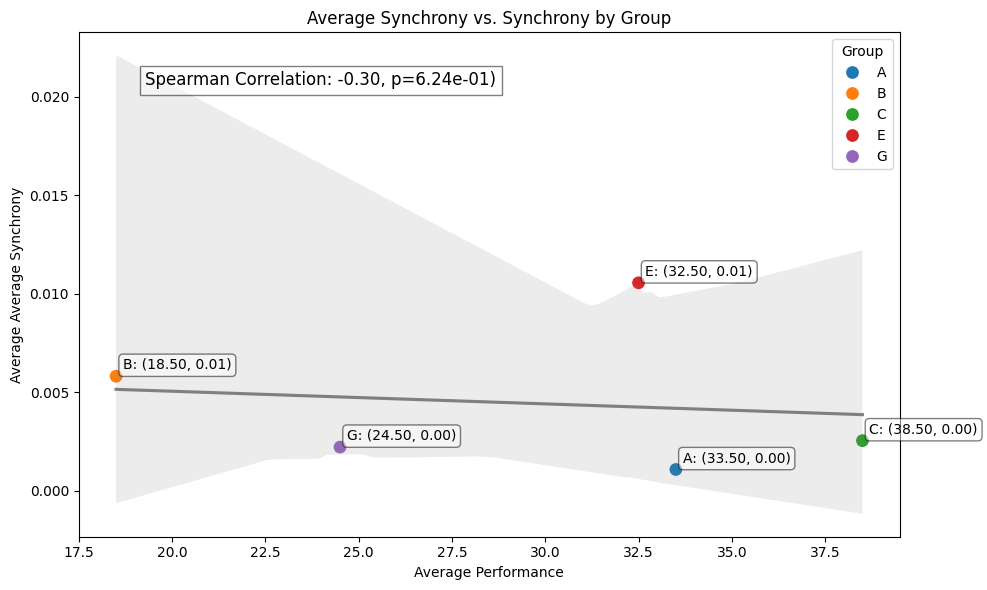

In [2]:
# 파일 경로
group_performance_file = 'C:/Users/user/Desktop/Group_performance.xlsx'
total_synchrony_file = 'D:/MultiModal/MultiModal_Model/Head_Rotation_Mouse/face_Synchrony/total_synchrony(delta)_1.xlsx'

# plot을 저장하기 위한 부분.
save_path = 'D:/MultiModal/MultiModal_Model/Head_Rotation_Mouse/face_Synchrony/'

# 데이터 불러오기
group_performance = pd.read_excel(group_performance_file)
total_synchrony = pd.read_excel(total_synchrony_file)

# 그룹 이름을 인덱스로 설정
group_performance.set_index(group_performance.columns[0], inplace=True)
total_synchrony.set_index(total_synchrony.columns[0], inplace=True)

# 두 데이터프레임 병합
merged_data = group_performance.join(total_synchrony, lsuffix='_performance', rsuffix='_Synchrony')

# NaN 값이 있는 행 제거
cleaned_data = merged_data.dropna()

# 각 주차별로 성능과 동기화 데이터 간의 상관관계 및 산점도 그리기
weeks = ['1W', '2W', '3W', '4W']

# 그룹별 주차 평균 계산
group_names = cleaned_data.index
avg_performance = cleaned_data[[f'{week}_performance' for week in weeks]].mean(axis=1)
avg_synchrony = cleaned_data[[f'{week}_Synchrony' for week in weeks]].mean(axis=1)


avg_data = pd.DataFrame({
    'Group': group_names,
    'Average Performance': avg_performance,
    'Average Synchrony': avg_synchrony
})

plt.figure(figsize=(10, 6))

# 산점도 그리기
scatter = sns.scatterplot(data=avg_data, x='Average Performance', y='Average Synchrony', hue='Group', palette='tab10', s=100)
sns.regplot(data=avg_data, x='Average Performance', y='Average Synchrony', scatter=False, color='gray')

# 각 그룹별 평균값 주석 추가
for index, row in avg_data.iterrows():
    group = row['Group']
    performance_mean = row['Average Performance']
    synchrony_mean = row['Average Synchrony']
    annotation_text = f'{group}: ({performance_mean:.2f}, {synchrony_mean:.2f})' # performance_mean
    plt.annotate(annotation_text, xy=(performance_mean, synchrony_mean), # performance_mean
                 xytext=(5, 5), textcoords='offset points', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

plt.title('Average Synchrony vs. Synchrony by Group') # Synchrony
plt.xlabel('Average Performance') # Performance
plt.ylabel('Average Average Synchrony') 

#x,y 축에 대한 범위를 조정해주기 위한 코드 
#plt.xlim(10, 50)
#plt.ylim(0.0, 3.0) # -0.005, 0.025

corr, p_value = spearmanr(avg_data['Average Performance'], avg_data['Average Synchrony'])
plt.figtext(0.15, 0.85, f'Spearman Correlation: {corr:.2f}, p={p_value:.2e})', fontsize=12, bbox=dict(facecolor='white', alpha=0.5)) # (p={p_value:.2e}

plt.legend(title='Group')
plt.tight_layout()
#plt.savefig(os.path.join(save_path, 'Average_Group_performance_vs_synchrony_by_groups.png')) # _synchrony_by_group.png'
plt.show()
#plt.close()

### 주차별 그룹의 성과 점수와 그룹의 얼굴 화전량과의 상관관계 그래프 (평균)

In [14]:
# 파일 경로
group_performance_file = 'C:/Users/user/Desktop/Group_performance.xlsx'

# 얼굴 총 회전량 값을 average한 값. 
face_total = 'C:/Users/user/Documents/Face_Rotation_total.xlsx'

# plot을 저장하기 위한 부분.
save_path = 'D:/MultiModal/MultiModal_Model/Head_Rotation_Mouse/face_Synchrony/'

# 데이터 불러오기
group_performance = pd.read_excel(group_performance_file)
# 얼굴 총 회전량 값 불러오는 위치.
total_face_rotation = pd.read_excel(face_total)

# 그룹 이름을 인덱스로 설정
group_performance.set_index(group_performance.columns[0], inplace=True)
total_face_rotation.set_index(total_face_rotation.columns[0], inplace=True)

# 두 데이터프레임 병합
merged_data = total_synchrony.join(total_face_rotation, lsuffix='_Performance', rsuffix='_face_rotation')

# NaN 값이 있는 행 제거
cleaned_data = merged_data.dropna()

# 각 주차별로 성능과 동기화 데이터 간의 상관관계 및 산점도 그리기
weeks = ['1W', '2W', '3W', '4W']

# 그룹별 주차 평균 계산
group_names = cleaned_data.index
avg_performance = cleaned_data[[f'{week}_Performance' for week in weeks]].mean(axis=1)
avg_face_rotation = cleaned_data[[f'{week}_face_rotation' for week in weeks]].mean(axis=1)

avg_data = pd.DataFrame({
    'Group': group_names,
    'Average Performance': avg_performance,
    'Average face rotation' : avg_face_rotation,
})

plt.figure(figsize=(10, 6))

# 산점도 그리기
scatter = sns.scatterplot(data=avg_data, x='Average Performance', y='Average face rotation', hue='Group', palette='tab10', s=100)
sns.regplot(data=avg_data, x='Average Performance', y='Average face rotation', scatter=False, color='gray')

# 각 그룹별 평균값 주석 추가
for index, row in avg_data.iterrows():
    group = row['Group']
    performance_mean = row['Average Performance']
    face_rotation_mean = row['Average face rotation'] # rotation
    annotation_text = f'{group}: ({performance_mean:.2f}, {face_rotation_mean:.2f})' # performance_mean
    plt.annotate(annotation_text, xy=(performance_mean, face_rotation_mean), # performance_mean
                 xytext=(5, 5), textcoords='offset points', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

plt.title('Average Synchrony vs. face rotation by Group') # Synchrony
plt.xlabel('Average Performance')
plt.ylabel('Average face rotation')

corr, p_value = spearmanr(avg_data['Average Performance'], avg_data['Average face rotation'])
plt.figtext(0.15, 0.85, f'Spearman Correlation: {corr:.2f})', fontsize=12, bbox=dict(facecolor='white', alpha=0.5)) # (p={p_value:.2e}

plt.legend(title='Group')
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'Average_Group_performance_vs_face_rotation_by_groups.png')) # _synchrony_by_group.png'
#plt.show()
plt.close()

### 주차별 그룹 성과 점수와 주차별 얼굴 움직임량 간의 상관관계 (평균)

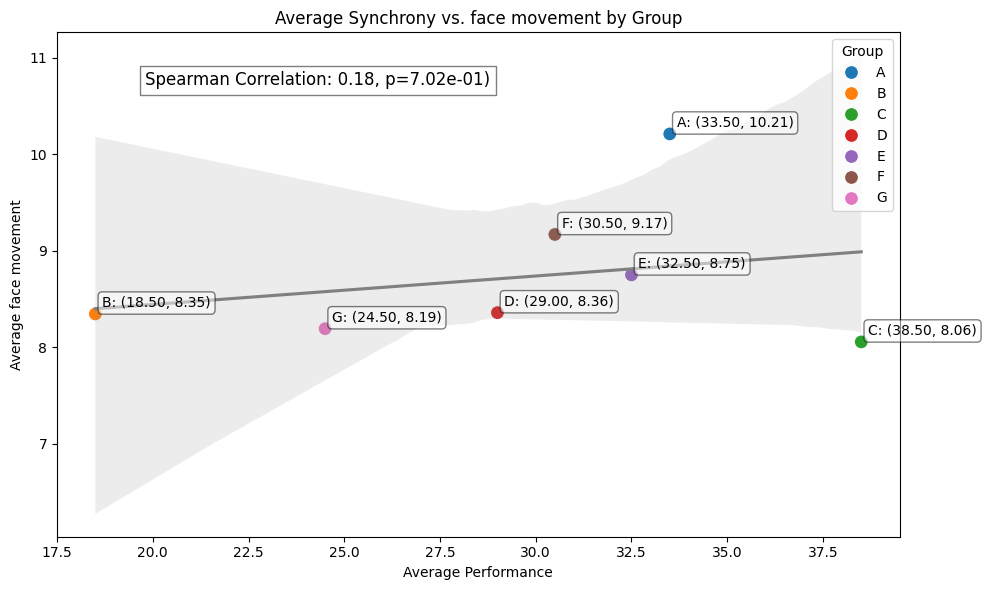

In [3]:
# 파일 경로
group_performance_file = 'C:/Users/user/Desktop/Group_performance.xlsx'

# 얼굴 몸 움직임량 값을 저장한 부분.
face_movement = 'D:/MultiModal/Data/Data_PreProcessing/Head_Rotation_Mouse/group_weekly_face_movement.xlsx'

# plot을 저장하기 위한 부분.
save_path = 'D:/MultiModal/MultiModal_Model/Head_Rotation_Mouse/face_Synchrony/'

# 데이터 불러오기
group_performance = pd.read_excel(group_performance_file)
# 얼굴 몸 움직임량 값 불러오는 위치. 
total_face_movement = pd.read_excel(face_movement)

# 그룹 이름을 인덱스로 설정
group_performance.set_index(group_performance.columns[0], inplace=True)
total_face_movement.set_index(total_face_movement.columns[0], inplace=True)

# 두 데이터프레임 병합
merged_data = group_performance.join(total_face_movement, lsuffix='_performance', rsuffix='_face_movement')

# NaN 값이 있는 행 제거
cleaned_data = merged_data.dropna()

# 각 주차별로 성능과 동기화 데이터 간의 상관관계 및 산점도 그리기
weeks = ['1W', '2W', '3W', '4W']

# 그룹별 주차 평균 계산
group_names = cleaned_data.index
avg_performance = cleaned_data[[f'{week}_performance' for week in weeks]].mean(axis=1)
avg_face_movement = cleaned_data[[f'{week}_face_movement' for week in weeks]].mean(axis=1)
#avg_body_movement = cleaned_data[[f'{week}_body_movement' for week in weeks]].mean(axis=1)

avg_data = pd.DataFrame({
    'Group': group_names,
    'Average Performance': avg_performance,
    'Average face movement' : avg_face_movement,
})

plt.figure(figsize=(10, 6))

# 산점도 그리기
scatter = sns.scatterplot(data=avg_data, x='Average Performance', y='Average face movement', hue='Group', palette='tab10', s=100)
sns.regplot(data=avg_data, x='Average Performance', y='Average face movement', scatter=False, color='gray')

# 각 그룹별 평균값 주석 추가
for index, row in avg_data.iterrows():
    group = row['Group']
    performance_mean = row['Average Performance']
    face_movement_mean = row['Average face movement']
    #body_movement_mean = row['Average body movement']
    annotation_text = f'{group}: ({performance_mean:.2f}, {face_movement_mean:.2f})' # performance_mean
    plt.annotate(annotation_text, xy=(performance_mean, face_movement_mean), # performance_mean
                 xytext=(5, 5), textcoords='offset points', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

plt.title('Average Synchrony vs. face movement by Group') # Synchrony
plt.xlabel('Average Performance')
plt.ylabel('Average face movement')

corr, p_value = spearmanr(avg_data['Average Performance'], avg_data['Average face movement'])
plt.figtext(0.15, 0.85, f'Spearman Correlation: {corr:.2f}, p={p_value:.2e})', fontsize=12, bbox=dict(facecolor='white', alpha=0.5)) # (p={p_value:.2e}

plt.legend(title='Group')
plt.tight_layout()
#plt.savefig(os.path.join(save_path, 'Average_Group_performance_vs_face_movement_by_groups.png')) # _synchrony_by_group.png'
plt.show()
#plt.close()

### 주차별 그룹 성과 점수와 주차별 그룹의 몸 움직임과의 상관관계 (평균)

In [17]:
# 파일 경로
group_performance_file = 'C:/Users/user/Desktop/Group_performance.xlsx'
body_movement = 'C:/Users/user/Documents/Body_total_movement.xlsx'

# plot을 저장하기 위한 부분.
save_path = 'D:/MultiModal/MultiModal_Model/Head_Rotation_Mouse/face_Synchrony/'

# 데이터 불러오기
group_performance = pd.read_excel(group_performance_file)
total_body_movement = pd.read_excel(body_movement)

# 그룹 이름을 인덱스로 설정
group_performance.set_index(group_performance.columns[0], inplace=True)
total_body_movement.set_index(total_body_movement.columns[0], inplace=True)

# 두 데이터프레임 병합
merged_data = group_performance.join(total_body_movement, lsuffix='_performance', rsuffix='_body_movement')

# NaN 값이 있는 행 제거
cleaned_data = merged_data.dropna()

# 각 주차별로 성능과 동기화 데이터 간의 상관관계 및 산점도 그리기
weeks = ['1W', '2W', '3W', '4W']

# 그룹별 주차 평균 계산
group_names = cleaned_data.index
avg_performance = cleaned_data[[f'{week}_performance' for week in weeks]].mean(axis=1)
avg_body_movement = cleaned_data[[f'{week}_body_movement' for week in weeks]].mean(axis=1)

avg_data = pd.DataFrame({
    'Group': group_names,
    'Average Performance': avg_performance,
    'Average body movement' : avg_body_movement
})

plt.figure(figsize=(10, 6))

# 산점도 그리기
scatter = sns.scatterplot(data=avg_data, x='Average Performance', y='Average body movement', hue='Group', palette='tab10', s=100)
sns.regplot(data=avg_data, x='Average Performance', y='Average body movement', scatter=False, color='gray')

# 각 그룹별 평균값 주석 추가
for index, row in avg_data.iterrows():
    group = row['Group']
    performance_mean = row['Average Performance']
    body_movement_mean = row['Average body movement']
    annotation_text = f'{group}: ({performance_mean:.2f}, {body_movement_mean:.2f})' # performance_mean
    plt.annotate(annotation_text, xy=(performance_mean, body_movement_mean), # performance_mean
                 xytext=(5, 5), textcoords='offset points', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

plt.title('Average Synchrony vs. Synchrony by Group')
plt.xlabel('Average Performance')
plt.ylabel('Average body movement') 

corr, p_value = spearmanr(avg_data['Average Performance'], avg_data['Average body movement'])
plt.figtext(0.15, 0.85, f'Spearman Correlation: {corr:.2f})', fontsize=12, bbox=dict(facecolor='white', alpha=0.5)) # (p={p_value:.2e}


plt.legend(title='Group')
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'Average_Group_performance_vs_Body_movement_by_groups.png')) # _synchrony_by_group.png'
#plt.show()
plt.close()

### 주차별 그룹의 성과 점수와 주차별 그룹의 입 모양과의 상관관계 (평균)

In [18]:
# 파일 경로
group_performance_file = 'C:/Users/user/Desktop/Group_performance.xlsx'

#얼굴 입 모양 값을 저장한 부분. 
lip_distance = 'D:/MultiModal/Data/Data_PreProcessing/Head_Rotation_Mouse/group_weekly_lip_distance_means.xlsx'  

# plot을 저장하기 위한 부분.
save_path = 'D:/MultiModal/MultiModal_Model/Head_Rotation_Mouse/face_Synchrony/'

# 데이터 불러오기
group_performance = pd.read_excel(group_performance_file)
total_lip_distance = pd.read_excel(lip_distance)

# 그룹 이름을 인덱스로 설정
group_performance.set_index(group_performance.columns[0], inplace=True)
total_lip_distance.set_index(total_lip_distance.columns[0], inplace=True)

# 두 데이터프레임 병합
merged_data = group_performance.join(total_lip_distance, lsuffix='_performance', rsuffix='_lip_distance')

# NaN 값이 있는 행 제거
cleaned_data = merged_data.dropna()

# 각 주차별로 성능과 동기화 데이터 간의 상관관계 및 산점도 그리기
weeks = ['1W', '2W', '3W', '4W']

# 그룹별 주차 평균 계산
group_names = cleaned_data.index
avg_performance = cleaned_data[[f'{week}_performance' for week in weeks]].mean(axis=1)
avg_lip_distance = cleaned_data[[f'{week}_lip_distance' for week in weeks]].mean(axis=1)

avg_data = pd.DataFrame({
    'Group': group_names,
    'Average Performance': avg_performance,
    'Average lip distance' : avg_lip_distance
})

plt.figure(figsize=(10, 6))

# 산점도 그리기
scatter = sns.scatterplot(data=avg_data, x='Average Performance', y='Average lip distance', hue='Group', palette='tab10', s=100)
sns.regplot(data=avg_data, x='Average Performance', y='Average lip distance', scatter=False, color='gray')

# 각 그룹별 평균값 주석 추가
for index, row in avg_data.iterrows():
    group = row['Group']
    performance_mean = row['Average Performance']
    lip_distance_mean = row['Average lip distance']
    annotation_text = f'{group}: ({performance_mean:.2f}, {lip_distance_mean:.2f})' # performance_mean
    plt.annotate(annotation_text, xy=(performance_mean, lip_distance_mean), # performance_mean
                 xytext=(5, 5), textcoords='offset points', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

plt.title('Average Synchrony vs. lip distance by Group') # Synchrony
plt.xlabel('Average Performance') # Performance
plt.ylabel('Average lip distance') # Average Synchrony

corr, p_value = spearmanr(avg_data['Average Performance'], avg_data['Average lip distance'])
plt.figtext(0.15, 0.85, f'Spearman Correlation: {corr:.2f})', fontsize=12, bbox=dict(facecolor='white', alpha=0.5)) # (p={p_value:.2e}

plt.legend(title='Group')
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'Average_Group_performance_vs_lip_distance_by_groups.png')) # _synchrony_by_group.png'
#plt.show()
plt.close()

### 주차별 평균 성과 점수와 머리 움직임 평균 값 간의 산점도

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import spearmanr

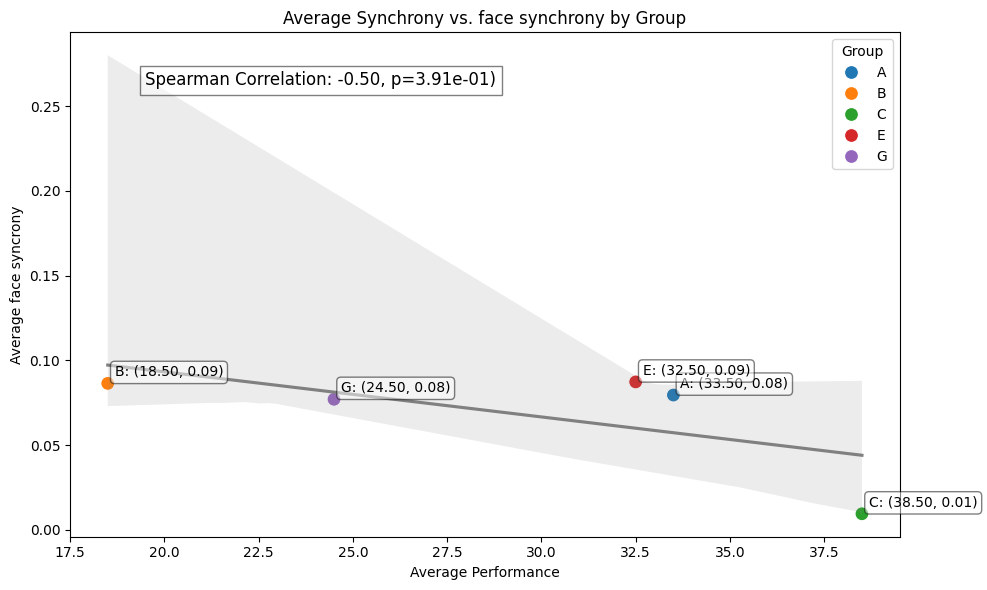

In [5]:
# 파일 경로
group_performance_file = 'C:/Users/user/Desktop/Group_performance.xlsx'

# 얼굴 움직임_sync 값이 저장된 경로. 
face_sync = 'D:/MultiModal/Data/Data_PreProcessing/Head_Rotation_Mouse/group_weekly_synchrony_means.xlsx'  

# plot을 저장하기 위한 부분.
save_path = 'D:/MultiModal/MultiModal_Model/Head_Rotation_Mouse/face_Synchrony/'

# 데이터 불러오기
group_performance = pd.read_excel(group_performance_file)
total_face_sync = pd.read_excel(face_sync)

# 그룹 이름을 인덱스로 설정
group_performance.set_index(group_performance.columns[0], inplace=True)
total_face_sync.set_index(total_face_sync.columns[0], inplace=True)

# 두 데이터프레임 병합
merged_data = group_performance.join(total_face_sync, lsuffix='_performance', rsuffix='_face_sync')

# NaN 값이 있는 행 제거
cleaned_data = merged_data.dropna()

# 각 주차별로 성능과 동기화 데이터 간의 상관관계 및 산점도 그리기
weeks = ['1W', '2W', '3W', '4W']

# 그룹별 주차 평균 계산
group_names = cleaned_data.index
avg_performance = cleaned_data[[f'{week}_performance' for week in weeks]].mean(axis=1)
avg_face_sync = cleaned_data[[f'{week}_face_sync' for week in weeks]].mean(axis=1)

avg_data = pd.DataFrame({
    'Group': group_names,
    'Average Performance': avg_performance,
    'Average face synchrony' : avg_face_sync
})

plt.figure(figsize=(10, 6))

# 산점도 그리기
scatter = sns.scatterplot(data=avg_data, x='Average Performance', y='Average face synchrony', hue='Group', palette='tab10', s=100)
sns.regplot(data=avg_data, x='Average Performance', y='Average face synchrony', scatter=False, color='gray')


# 각 그룹별 평균값 주석 추가
for index, row in avg_data.iterrows():
    group = row['Group']
    performance_mean = row['Average Performance']
    face_synchrony_mean = row['Average face synchrony']
    annotation_text = f'{group}: ({performance_mean:.2f}, {face_synchrony_mean:.2f})' # performance_mean
    plt.annotate(annotation_text, xy=(performance_mean, face_synchrony_mean), 
                 xytext=(5, 5), textcoords='offset points', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

plt.title('Average Synchrony vs. face synchrony by Group') # Synchrony
plt.xlabel('Average Performance') # Performance
plt.ylabel('Average face syncrony') # Average Synchrony

# Spearman 상관계수 계산 및 표시
corr, p_value = spearmanr(avg_data['Average Performance'], avg_data['Average face synchrony'])
plt.figtext(0.15, 0.85, f'Spearman Correlation: {corr:.2f}, p={p_value:.2e})', fontsize=12, bbox=dict(facecolor='white', alpha=0.5)) # (p={p_value:.2e}

plt.legend(title='Group')
plt.tight_layout()
#plt.savefig(os.path.join(save_path, 'Average_Group_performance_vs_face_sync_by_groups.png')) # _synchrony_by_group.png'
plt.show()
#plt.close()